In [1]:
import pandas as pd

bc = pd.read_csv('C:\\Users\\sjjung\\Desktop\\contestData\\bccard.csv')
bc

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519292,202103,20,여가/스포츠,2013,여행,여성,30대,1인가구,서울특별시,영등포구,영등포동7가,1411368,7
519293,202103,21,e상품/서비스,2110,o2o서비스,남성,30대,1인가구,서울특별시,영등포구,영등포동7가,1386040,63
519294,202103,11,패션잡화,1113,시계/주얼리,여성,30대,신혼영유아가구,서울특별시,영등포구,영등포동7가,390818,7
519295,202103,16,식품,1610,가공식품,남성,40대,초중고자녀가구,서울특별시,영등포구,영등포동7가,327592,7


In [2]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB


In [3]:
bc.isnull().sum()

기준년월          0
품목대분류코드       0
품목대분류명        0
품목중분류코드       0
품목중분류명        0
성별            0
연령            0
가구생애주기        0
고객소재지_광역시도    0
고객소재지_시군구     0
고객소재지_읍면동     0
매출금액          0
매출건수          0
dtype: int64

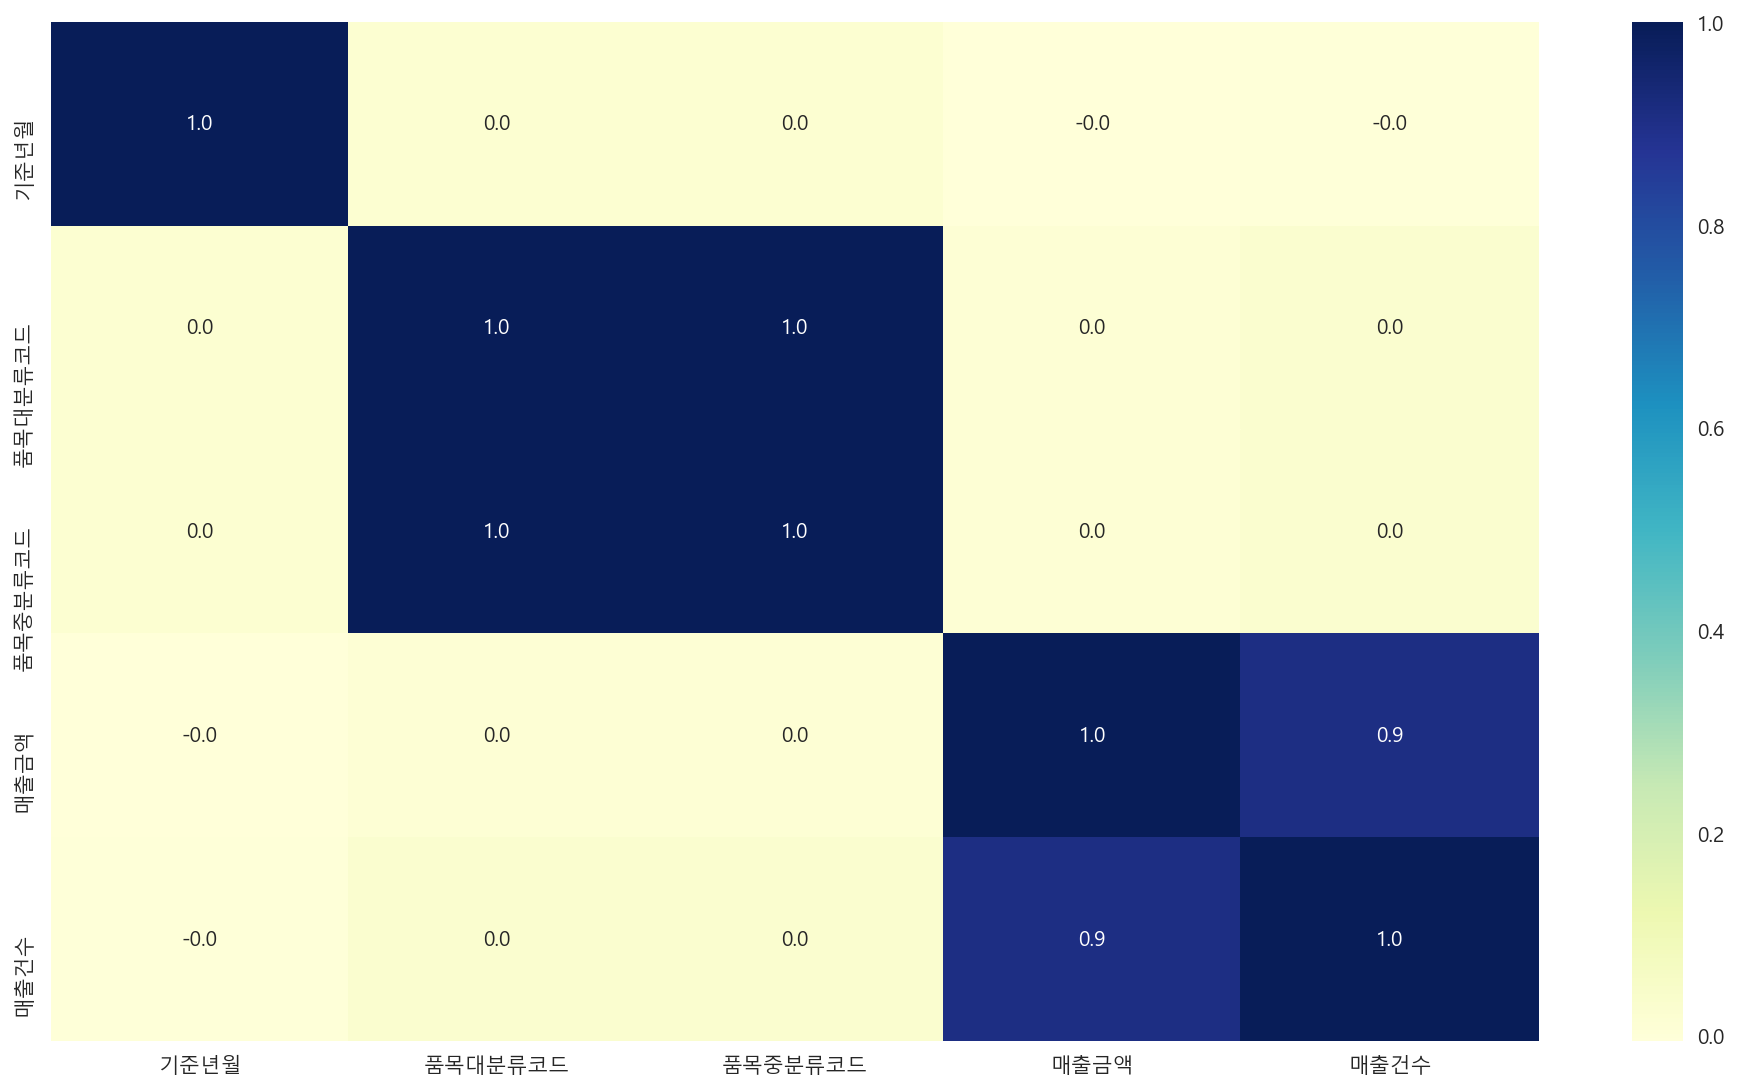

In [4]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
%matplotlib inline

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family = font_name)

plt.style.use('seaborn') # seaborn 스타일로 변환
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
pd.set_option('display.max_columns',None)
warnings.filterwarnings(action='ignore') # Warning Message 안 보이게
import pandas.util.testing as tm

import matplotlib as mpl # 고해상도 Plot 을 위해 DPI 조절
mpl.rcParams['figure.dpi']=150

plt.figure(figsize=(16,9))
sns.heatmap(bc.corr(),cmap='YlGnBu',annot=True,fmt="0.1f") 
plt.show()

In [5]:
bc.고객소재지_광역시도.unique()

array(['서울특별시', '경기도', '인천광역시'], dtype=object)

In [6]:
bc[bc.columns[bc.dtypes.map(lambda x: x=='object')]].describe().transpose()

,count,unique,top,freq
품목대분류명,519297,13,e상품/서비스,76052
품목중분류명,519297,50,o2o서비스,42064
성별,519297,2,여성,330244
연령,519297,6,40대,159877
가구생애주기,519297,5,신혼영유아가구,178693
고객소재지_광역시도,519297,3,서울특별시,306122
고객소재지_시군구,519297,38,수원시,38891
고객소재지_읍면동,519297,685,논현동,4251


In [7]:
# 컬럼 재정렬
bc.drop(['고객소재지_광역시도','고객소재지_시군구','고객소재지_읍면동'],axis=1,inplace=True)
bc.drop(['품목대분류코드','품목중분류코드'],axis=1,inplace=True)
bc

,기준년월,품목대분류명,품목중분류명,성별,연령,가구생애주기,매출금액,매출건수
0,201903,의류,여성의류,여성,40대,초중고자녀가구,782521,13
1,201903,e상품/서비스,o2o서비스,여성,20대,신혼영유아가구,963789,29
2,201903,출산/육아,육아용품서비스,여성,30대,신혼영유아가구,924309,46
3,201903,e상품/서비스,e머니/상품권,여성,30대,신혼영유아가구,1089360,54
4,201903,생활,생활용품,여성,30대,신혼영유아가구,1656740,58
...,...,...,...,...,...,...,...,...
519292,202103,여가/스포츠,여행,여성,30대,1인가구,1411368,7
519293,202103,e상품/서비스,o2o서비스,남성,30대,1인가구,1386040,63
519294,202103,패션잡화,시계/주얼리,여성,30대,신혼영유아가구,390818,7
519295,202103,식품,가공식품,남성,40대,초중고자녀가구,327592,7


In [8]:
# 연령 컬럼 1,2,3,4,5,6
bc['연령'].unique() # array(['40대', '20대', '30대', '50대', '60대 이상', '20세 미만'], dtype=object)

def age(x):
    if x == '20세 미만':
        return x.replace(x,'1')
    elif x == '20대':
        return x.replace(x,'2')
    elif x == '30대':
        return x.replace(x,'3')
    elif x == '40대':
        return x.replace(x,'4')
    elif x == '50대':
        return x.replace(x,'5')
    else:
        return x.replace(x,'6')

bc['연령'] = bc['연령'].apply(age)
bc['연령'] = bc['연령'].astype('int64')

In [9]:
# 성별 컬럼 여 1, 남 0
bc['성별'] = bc['성별'].apply(lambda x:1 if x=='여성' else 0)

In [10]:
# 파생변수 추가 매출평균
pd.options.display.float_format = '{:,.0f}'.format
bc['매출평균'] = bc['매출금액']/bc['매출건수']

In [11]:
# 파생변수2 추가 mz세대 -> 연령(1,2,3) -> 1, 나머지 0
bc['mz세대'] = bc['연령'].apply(lambda x:1 if x in (1,2,3) else 0)

In [12]:
bc

,기준년월,품목대분류명,품목중분류명,성별,연령,가구생애주기,매출금액,매출건수,매출평균,mz세대
0,201903,의류,여성의류,1,4,초중고자녀가구,782521,13,"60,194",0
1,201903,e상품/서비스,o2o서비스,1,2,신혼영유아가구,963789,29,"33,234",1
2,201903,출산/육아,육아용품서비스,1,3,신혼영유아가구,924309,46,"20,094",1
3,201903,e상품/서비스,e머니/상품권,1,3,신혼영유아가구,1089360,54,"20,173",1
4,201903,생활,생활용품,1,3,신혼영유아가구,1656740,58,"28,564",1
...,...,...,...,...,...,...,...,...,...,...
519292,202103,여가/스포츠,여행,1,3,1인가구,1411368,7,"201,624",1
519293,202103,e상품/서비스,o2o서비스,0,3,1인가구,1386040,63,"22,001",1
519294,202103,패션잡화,시계/주얼리,1,3,신혼영유아가구,390818,7,"55,831",1
519295,202103,식품,가공식품,0,4,초중고자녀가구,327592,7,"46,799",0


In [13]:
bc.가구생애주기.unique()

array(['초중고자녀가구', '신혼영유아가구', '성인자녀가구', '1인가구', '노인가구'], dtype=object)

In [14]:
bc2 = pd.get_dummies(bc.iloc[:,:-1])

In [15]:
bc2

,기준년월,성별,연령,매출금액,매출건수,매출평균,품목대분류명_e상품/서비스,품목대분류명_가구,품목대분류명_건강,품목대분류명_기타,품목대분류명_뷰티,품목대분류명_생활,품목대분류명_식품,품목대분류명_여가/스포츠,품목대분류명_의류,품목대분류명_인테리어,품목대분류명_전자,품목대분류명_출산/육아,품목대분류명_패션잡화,품목중분류명_DIY자재/용품,품목중분류명_e머니/상품권,품목중분류명_o2o서비스,품목중분류명_가공식품,품목중분류명_가방,품목중분류명_가전,품목중분류명_건강식품,품목중분류명_기부/후원,품목중분류명_기타,품목중분류명_기타결제,품목중분류명_기타교육비,품목중분류명_남성뷰티,품목중분류명_남성속옷실내복,품목중분류명_남성의류,품목중분류명_다이어트,품목중분류명_디지털,품목중분류명_레저,품목중분류명_메이크업,품목중분류명_모바일상품,품목중분류명_문화,품목중분류명_미성년자이용불가,품목중분류명_바디케어,품목중분류명_반려동물,품목중분류명_베이비용품서비스,품목중분류명_뷰티소품,품목중분류명_생활용품,품목중분류명_소파/의자,품목중분류명_수납가구,품목중분류명_스킨케어,품목중분류명_스포츠,품목중분류명_스포츠의류,품목중분류명_시계/주얼리,품목중분류명_신발,품목중분류명_신선/요리재료,품목중분류명_양말,품목중분류명_어린이용품서비스,품목중분류명_여성속옷실내복,품목중분류명_여성의류,품목중분류명_여행,품목중분류명_육아용품서비스,품목중분류명_음료,품목중분류명_인테리어소품,품목중분류명_임산부용품서비스,품목중분류명_자동차,품목중분류명_취미/특기,품목중분류명_침구/수예,품목중분류명_침대,품목중분류명_테이블가구,품목중분류명_패션소품,품목중분류명_향수,가구생애주기_1인가구,가구생애주기_노인가구,가구생애주기_성인자녀가구,가구생애주기_신혼영유아가구,가구생애주기_초중고자녀가구
0,201903,1,4,782521,13,"60,194",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,201903,1,2,963789,29,"33,234",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,201903,1,3,924309,46,"20,094",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,201903,1,3,1089360,54,"20,173",1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,201903,1,3,1656740,58,"28,564",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519292,202103,1,3,1411368,7,"201,624",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
519293,202103,0,3,1386040,63,"22,001",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
519294,202103,1,3,390818,7,"55,831",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
519295,202103,0,4,327592,7,"46,799",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
bc_mz = bc[bc['mz세대']==1]

In [17]:
bc_mz[bc_mz.columns[bc_mz.dtypes.map(lambda x: x=='object')]].describe().transpose()

,count,unique,top,freq
품목대분류명,256775,13,e상품/서비스,40852
품목중분류명,256775,50,o2o서비스,21133
가구생애주기,256775,3,신혼영유아가구,133102


In [18]:
bc_mz_big1 = bc_mz.groupby('품목대분류명')['매출금액','매출건수'].sum().reset_index()
bc_mz_big2 = bc_mz.groupby('품목대분류명')['매출평균'].mean().reset_index()

bc_mz_big = pd.merge(bc_mz_big1,bc_mz_big2)

In [19]:
bc_mz_big.sort_values(by=['매출건수','매출금액','매출평균'],ascending=False)

,품목대분류명,매출금액,매출건수,매출평균
0,e상품/서비스,262624988990,7810901,"31,707"
7,여가/스포츠,81288085009,1481261,"59,316"
6,식품,39747543486,1235714,"31,591"
11,출산/육아,35434445599,851939,"44,949"
5,생활,28223383162,797793,"38,607"
10,전자,48665730497,563137,"96,487"
8,의류,27608531286,482998,"57,538"
4,뷰티,18062588148,479303,"37,337"
12,패션잡화,24511228788,401997,"65,886"
2,건강,19118859933,392985,"49,044"


In [20]:
bc_mz_small1 = bc_mz.groupby('품목중분류명')['매출금액','매출건수'].sum().reset_index()
bc_mz_small2 = bc_mz.groupby('품목중분류명')['매출평균'].mean().reset_index()

bc_mz_small = pd.merge(bc_mz_small1,bc_mz_small2)

bc_mz_small.sort_values(by=['매출건수','매출금액','매출평균'],ascending=False)

,품목중분류명,매출금액,매출건수,매출평균
2,o2o서비스,222347255630,6631052,"33,832"
1,e머니/상품권,36445886986,953588,"36,570"
44,취미/특기,34354605849,775844,"49,442"
25,생활용품,22644077594,663564,"35,639"
33,신선/요리재료,18933421462,501335,"38,052"
15,디지털,33338498604,443450,"80,310"
38,여행,33295067262,442130,"75,503"
3,가공식품,12095875391,395284,"30,666"
6,건강식품,18235706465,374483,"49,007"
40,음료,8718246633,339095,"25,396"


In [21]:
bc_mz['가구생애주기'][(bc['품목대분류명'] =='e상품/서비스') | (bc['품목대분류명'] == '여가/스포츠')].describe().transpose().reset_index()

,index,가구생애주기
0,count,75312
1,unique,3
2,top,1인가구
3,freq,38745


In [22]:
bc_mz['가구생애주기'][(bc['품목중분류명'] =='e머니/상품권') | (bc['품목중분류명'] == 'o2o서비스') 
                | (bc['품목중분류명'] == '취미/특기')].describe().transpose().reset_index()

,index,가구생애주기
0,count,45677
1,unique,3
2,top,1인가구
3,freq,24716


In [23]:
bc

,기준년월,품목대분류명,품목중분류명,성별,연령,가구생애주기,매출금액,매출건수,매출평균,mz세대
0,201903,의류,여성의류,1,4,초중고자녀가구,782521,13,"60,194",0
1,201903,e상품/서비스,o2o서비스,1,2,신혼영유아가구,963789,29,"33,234",1
2,201903,출산/육아,육아용품서비스,1,3,신혼영유아가구,924309,46,"20,094",1
3,201903,e상품/서비스,e머니/상품권,1,3,신혼영유아가구,1089360,54,"20,173",1
4,201903,생활,생활용품,1,3,신혼영유아가구,1656740,58,"28,564",1
...,...,...,...,...,...,...,...,...,...,...
519292,202103,여가/스포츠,여행,1,3,1인가구,1411368,7,"201,624",1
519293,202103,e상품/서비스,o2o서비스,0,3,1인가구,1386040,63,"22,001",1
519294,202103,패션잡화,시계/주얼리,1,3,신혼영유아가구,390818,7,"55,831",1
519295,202103,식품,가공식품,0,4,초중고자녀가구,327592,7,"46,799",0


In [24]:
mz2019 = bc_mz[(bc_mz['기준년월']==201903) | (bc_mz['기준년월']==201909)]
mz2019.drop(['기준년월'],axis=1,inplace=True)

In [25]:
mz2021 = bc_mz[(bc_mz['기준년월']==202003) | (bc_mz['기준년월']==202009) | (bc_mz['기준년월']==202103)]
mz2021.drop(['기준년월'],axis=1,inplace=True)

In [26]:
mz2021_total = mz2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수'].sum().reset_index()
mz2021_avg = mz2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

mz2021_consume = pd.merge(mz2021_total,mz2021_avg)

In [27]:
mz2021_consume.sort_values(by=['매출건수','매출금액','매출평균'],ascending=False).head(10)

,품목대분류명,품목중분류명,매출금액,매출건수,매출평균
1,e상품/서비스,o2o서비스,146902585187,4453158,"32,793"
0,e상품/서비스,e머니/상품권,24315289844,596423,"39,002"
30,여가/스포츠,취미/특기,22406531038,498083,"49,517"
21,생활,생활용품,13223081546,389597,"35,582"
24,식품,신선/요리재료,12794976089,343474,"37,394"
40,전자,디지털,21924514467,275125,"84,993"
23,식품,가공식품,8139735406,269966,"30,134"
8,건강,건강식품,11987561626,243171,"48,596"
29,여가/스포츠,여행,14682088802,222861,"68,020"
25,식품,음료,5419862816,216789,"25,014"


In [28]:
mz2019_total = mz2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수'].sum().reset_index()
mz2019_avg = mz2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

mz2019_consume = pd.merge(mz2019_total,mz2019_avg)

mz2019_consume.sort_values(by=['매출건수','매출금액','매출평균'],ascending=False).head(10)

,품목대분류명,품목중분류명,매출금액,매출건수,매출평균
1,e상품/서비스,o2o서비스,75444670443,2177894,"35,641"
0,e상품/서비스,e머니/상품권,12130597142,357165,"32,242"
29,여가/스포츠,취미/특기,11948074811,277761,"49,305"
20,생활,생활용품,9420996048,273967,"35,736"
28,여가/스포츠,여행,18612978460,219269,"86,093"
39,전자,디지털,11413984137,168325,"72,053"
23,식품,신선/요리재료,6138445373,157861,"39,383"
42,출산/육아,육아용품서비스,5045078776,142441,"39,483"
41,출산/육아,어린이용품서비스,5261334781,132296,"43,419"
8,건강,건강식품,6248144839,131312,"49,789"


In [29]:
mz2021

,품목대분류명,품목중분류명,성별,연령,가구생애주기,매출금액,매출건수,매출평균,mz세대
177298,여가/스포츠,여행,0,2,1인가구,201000,5,"40,200",1
177305,여가/스포츠,문화,0,3,신혼영유아가구,396400,4,"99,100",1
177306,여가/스포츠,여행,1,2,1인가구,4934890,75,"65,799",1
177307,전자,디지털,0,2,신혼영유아가구,85200,4,"21,300",1
177308,전자,디지털,0,2,1인가구,5903422,36,"163,984",1
...,...,...,...,...,...,...,...,...,...
519290,생활,반려동물,1,2,1인가구,284949,7,"40,707",1
519291,생활,생활용품,1,3,1인가구,332870,5,"66,574",1
519292,여가/스포츠,여행,1,3,1인가구,1411368,7,"201,624",1
519293,e상품/서비스,o2o서비스,0,3,1인가구,1386040,63,"22,001",1


In [30]:
mz2021.가구생애주기.unique()

array(['1인가구', '신혼영유아가구', '초중고자녀가구'], dtype=object)

In [31]:
mz2021.drop(['품목대분류명','mz세대'],axis=1,inplace=True)

In [32]:
df = mz2021[mz2021['품목중분류명'].apply(lambda x: x in (['신선/요리재료','가공식품','건강식품']))]
df

,품목중분류명,성별,연령,가구생애주기,매출금액,매출건수,매출평균
177711,건강식품,0,3,신혼영유아가구,1412089,14,"100,864"
179187,건강식품,0,2,1인가구,107900,5,"21,580"
179273,건강식품,1,3,신혼영유아가구,19018995,178,"106,848"
179367,신선/요리재료,0,3,신혼영유아가구,524224,14,"37,445"
179394,신선/요리재료,0,3,신혼영유아가구,709543,20,"35,477"
...,...,...,...,...,...,...,...
519254,신선/요리재료,1,2,1인가구,703280,16,"43,955"
519265,가공식품,0,3,신혼영유아가구,170186,5,"34,037"
519274,가공식품,1,3,1인가구,1693750,7,"241,964"
519275,가공식품,1,2,1인가구,296732,9,"32,970"


In [33]:
# data
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import parallel_coordinates

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# grid search
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *


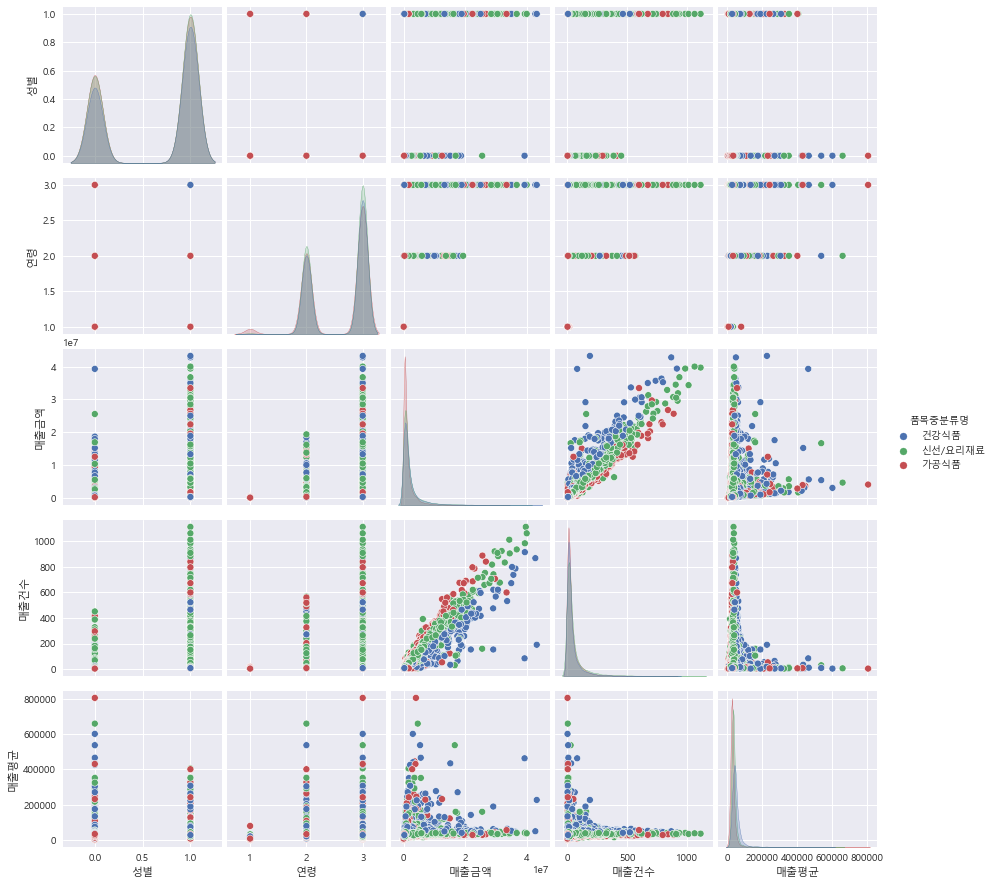

In [34]:
sns.pairplot(df,hue="품목중분류명")
plt.show()

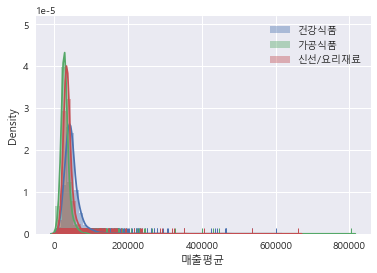

In [35]:
#displot

sns.distplot(df[df.품목중분류명 == "건강식품"]["매출평균"], hist=True, rug=True, label="건강식품")
sns.distplot(df[df.품목중분류명 == "가공식품"]["매출평균"], hist=True, rug=True, label="가공식품")
sns.distplot(df[df.품목중분류명 == "신선/요리재료"]["매출평균"], hist=True, rug=True, label="신선/요리재료")
plt.legend()
plt.show()

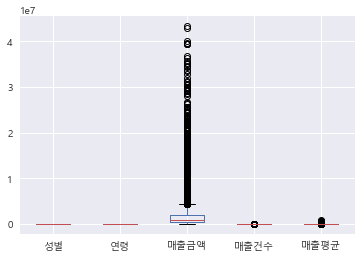

In [36]:
df.boxplot()
plt.show()

In [37]:
df['품목'] = df['품목중분류명'].apply(lambda x: 1 if x=='건강식품' else( 2 if x=='신선/요리재료' else 3))

In [38]:
df2 = df.iloc[:,1:]

In [64]:
# 명목형 변수 더미화
x = pd.get_dummies(df2.iloc[ : , 0:-1 ])
y = df2.iloc[ : , -1 ]

# 정규화 + 계산
from  sklearn.preprocessing  import MinMaxScaler

x_scaled = MinMaxScaler().fit(x).transform(x)

# 훈련 데이터와 테스트 데이터를 분리
from  sklearn.model_selection  import   train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)
#print(x_train.shape)  # (14570, 8)
#print(x_test.shape)  # (3643, 8)
#print(y_train.shape)  # (14570,)
#print(y_test.shape) # (3643,)


# 모델 생성
from  sklearn.neighbors   import  KNeighborsClassifier

knn_m = KNeighborsClassifier()  # knn 모델생성

grid_params = {
    'n_neighbors' : list(range(1,16,2)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

gs_m = GridSearchCV(knn_m, grid_params, cv=10)
gs_m.fit(x_train, y_train)
print("Best Parameters : ", gs_m.best_params_) # Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
print("Best Score : ", gs_m.best_score_) # Best Score :  0.527522306108442
print("Best Test Score : ", gs_m.score(x_test, y_test)) # Best Test Score :  0.5182541861103486




Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
Best Score :  0.527522306108442
Best Test Score :  0.5182541861103486


In [66]:
#4.   모델 생성
from  sklearn.tree  import  DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

#5.   모델 훈련
model.fit(x_train, y_train)

#6.   모델 예측
result = model.predict(x_test)

#7.   모델 평가
print(model.score(x_train,y_train)) 
print(model.score(x_test,y_test))  
print(model.feature_importances_)

print(x.columns)

0.5531914893617021
0.553390063134779
[0.0170977  0.04481727 0.05234271 0.09786981 0.76870185 0.00538932
 0.01378135 0.        ]
Index(['성별', '연령', '매출금액', '매출건수', '매출평균', '가구생애주기_1인가구', '가구생애주기_신혼영유아가구',
       '가구생애주기_초중고자녀가구'],
      dtype='object')
